## Predict Stock Prices Using Machine Learning and Python

https://www.youtube.com/watch?v=hOLSGMEEwlI

In [43]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [44]:
one_day = dt.timedelta(1)
sixty_one_days = dt.timedelta(101)
date = pd.to_datetime('today')

start = date - sixty_one_days
end = date - one_day

# Remote Data Error
# I don't know why
# df = web.DataReader('NFLX', 'yahoo', start=start, end=end)
df = yf.download(tickers='NFLX', interval='1d', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [45]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
2021-03-24,533.780029,534.419983,520.000000,520.809998,520.809998,4102200
2021-03-25,516.989990,518.530029,497.000000,502.859985,502.859985,4926800
2021-03-26,502.820007,508.720001,496.679993,508.049988,508.049988,3467800
2021-03-29,505.660004,518.000000,504.399994,513.950012,513.950012,3330000


In [46]:
df.shape

(70, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

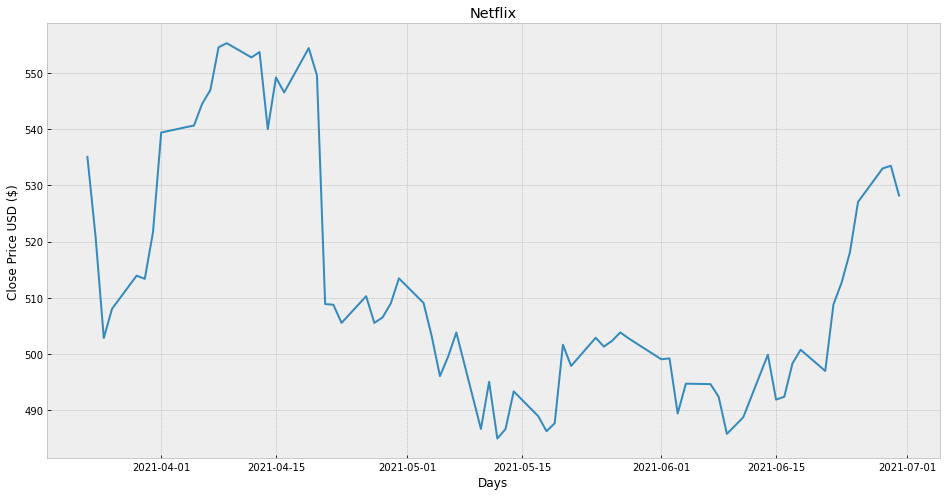

In [47]:
# Visualize close price
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show

In [48]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
2021-03-24,533.780029,534.419983,520.000000,520.809998,520.809998,4102200
2021-03-25,516.989990,518.530029,497.000000,502.859985,502.859985,4926800
2021-03-26,502.820007,508.720001,496.679993,508.049988,508.049988,3467800
2021-03-29,505.660004,518.000000,504.399994,513.950012,513.950012,3330000


In [49]:
df = pd.DataFrame(df['Close'])

In [50]:
df.head()

,Close
Date,
2021-03-23,535.090027
2021-03-24,520.809998
2021-03-25,502.859985
2021-03-26,508.049988
2021-03-29,513.950012


In [51]:
df.shape

(70, 1)

In [52]:
# Create a variable to predict 'x' days out into the future
future_days = 25

# Create a new column (target) shifted 'x' days/units up
df['Prediction'] = df[['Close']].shift(-future_days)

In [53]:
df.tail()

,Close,Prediction
Date,,
2021-06-24,518.059998,NaN
2021-06-25,527.070007,NaN
2021-06-28,533.030029,NaN
2021-06-29,533.500000,NaN
2021-06-30,528.210022,NaN


In [54]:
df.shape

(70, 2)

In [55]:
# Create feature data set (X) and convert it to numpy array and remove last 'x' days/rows
X = np.array(df.drop(['Prediction'], 1))[:-future_days]

In [56]:
X

array([[535.09002686],
       [520.80999756],
       [502.85998535],
       [508.04998779],
       [513.95001221],
       [513.39001465],
       [521.65997314],
       [539.41998291],
       [540.66998291],
       [544.5300293 ],
       [546.98999023],
       [554.58001709],
       [555.30999756],
       [552.7800293 ],
       [553.72998047],
       [540.02001953],
       [549.2199707 ],
       [546.53997803],
       [554.44000244],
       [549.57000732],
       [508.8999939 ],
       [508.77999878],
       [505.54998779],
       [510.29998779],
       [505.54998779],
       [506.51998901],
       [509.        ],
       [513.4699707 ],
       [509.10998535],
       [503.17999268],
       [496.07998657],
       [499.54998779],
       [503.83999634],
       [486.69000244],
       [495.07998657],
       [484.98001099],
       [486.66000366],
       [493.36999512],
       [488.94000244],
       [486.27999878],
       [487.70001221],
       [501.67001343],
       [497.89001465],
       [502

In [57]:
# Create the target data set (y) and convert it to a numpy array to get all the target values except the last 'x' days/rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[506.51998901 509.         513.4699707  509.10998535 503.17999268
 496.07998657 499.54998779 503.83999634 486.69000244 495.07998657
 484.98001099 486.66000366 493.36999512 488.94000244 486.27999878
 487.70001221 501.67001343 497.89001465 502.8999939  501.33999634
 502.35998535 503.85998535 502.80999756 499.07998657 499.23999023
 489.42999268 494.73999023 494.66000366 492.39001465 485.80999756
 487.26998901 488.76998901 499.89001465 491.8999939  492.41000366
 498.33999634 500.76998901 497.         508.82000732 512.73999023
 518.05999756 527.07000732 533.0300293  533.5        528.21002197]


In [58]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [59]:
# Create the models
# Create the Decision Tree Regressor Model
tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

In [60]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[508.8999939 ],
       [508.77999878],
       [505.54998779],
       [510.29998779],
       [505.54998779],
       [506.51998901],
       [509.        ],
       [513.4699707 ],
       [509.10998535],
       [503.17999268],
       [496.07998657],
       [499.54998779],
       [503.83999634],
       [486.69000244],
       [495.07998657],
       [484.98001099],
       [486.66000366],
       [493.36999512],
       [488.94000244],
       [486.27999878],
       [487.70001221],
       [501.67001343],
       [497.89001465],
       [502.8999939 ],
       [501.33999634]])

In [61]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[502.35998535 503.85998535 501.0249939  499.07998657 501.0249939
 489.42999268 494.73999023 494.66000366 494.73999023 485.80999756
 492.41000366 488.76998901 485.80999756 491.8999939  492.41000366
 498.33999634 500.76998901 497.         518.05999756 512.73999023
 518.05999756 527.07000732 533.0300293  533.5        528.21002197]

[502.81484414 502.84243952 503.5852478  502.49288639 503.5852478
 503.36217582 502.79184566 501.76388282 502.76655223 504.13027753
 505.76307177 504.96507273 503.97849594 507.92249414 505.99304259
 508.31574228 507.92939298 506.38629073 507.40505979 508.01678302
 507.69022136 504.47752869 505.34681812 504.19466907 504.553423  ]


/home/bobbyhuck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


''

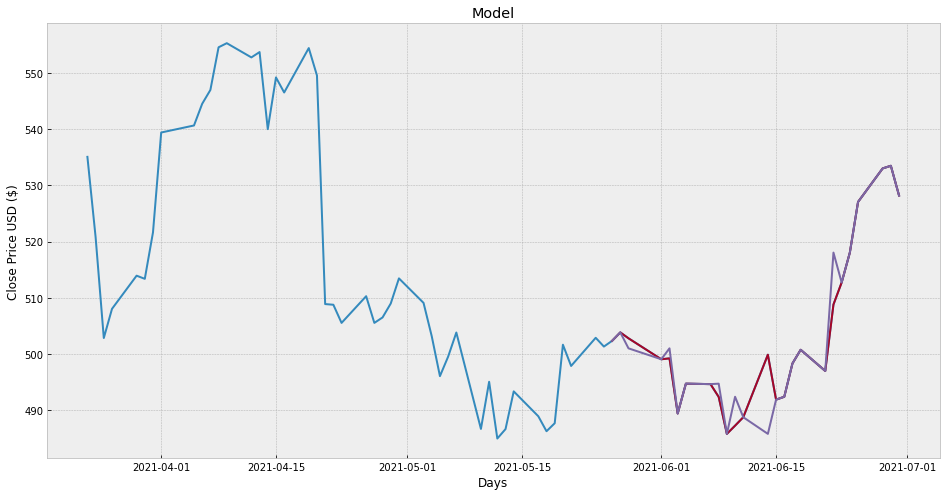

In [65]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
#plt.legend('Orig', 'Val', 'Pred')
;

/home/bobbyhuck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


''

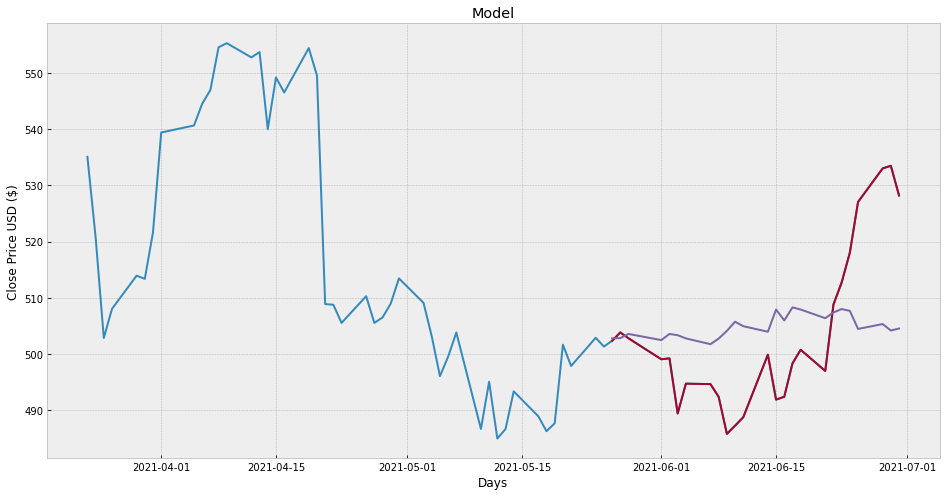

In [66]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
#plt.legend('Orig', 'Val', 'Pred')
;